# Preparación del modelo

## Importación de librerías

In [7]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import seaborn as sns

## Carga de datos

In [4]:
df = pd.read_csv('data/denue_inegi_final.csv')
df.head(2)

,localidad,ageb,manzana,nom_estab,codigo_act,nombre_act,P6A14NAE,SBASC,PSDSS,OVSDE,...,OVPT,OVSREF,OVSINT,OVSCEL,OVHAC,geometry,step,Depth,Rain,Velocity
0,Ciudad de Villa de Álvarez,0288,24,INSTITUTO TECNOLOGICO DE COLIMA,611312,Escuelas de educación superior del sector público,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POINT (634020.8780960208 2130335.3075941727),0.0,NaN,0.0,NaN
1,Ciudad de Villa de Álvarez,0288,24,INSTITUTO TECNOLOGICO DE COLIMA,611312,Escuelas de educación superior del sector público,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POINT (634020.9224918417 2130335.2736098766),0.0,NaN,0.0,NaN


In [6]:
df.sort_values(by=['nom_estab',"step"], inplace=True)
df.head(2)

,localidad,ageb,manzana,nom_estab,codigo_act,nombre_act,P6A14NAE,SBASC,PSDSS,OVSDE,...,OVPT,OVSREF,OVSINT,OVSCEL,OVHAC,geometry,step,Depth,Rain,Velocity
6156,Colima,0746,20,ACADEMIA DE ARTES,611611,Escuelas de arte del sector privado,1.923077,10.915493,20.382166,0.109529,...,0.109529,2.957284,18.181818,6.681271,8.433735,POINT (634036.5867531523 2128200.5850702557),0.0,NaN,0.0,NaN
6210,Colima,0746,20,ACADEMIA DE ARTES,611611,Escuelas de arte del sector privado,1.923077,10.915493,20.382166,0.109529,...,0.109529,2.957284,18.181818,6.681271,8.433735,POINT (634036.5867531523 2128200.5850702557),300.0,NaN,0.0,NaN


In [39]:
len(df.nombre_act.unique())

23

In [41]:
df.nombre_act.unique()

array(['Escuelas de arte del sector privado',
       'Escuelas de idiomas del sector privado',
       'Escuelas de educación media superior del sector privado',
       'Escuelas de deporte del sector privado',
       'Escuelas del sector privado dedicadas a la enseñanza de oficios',
       'Escuelas de educación preescolar del sector público',
       'Escuelas del sector privado que combinan diversos niveles de educación',
       'Escuelas del sector público dedicadas a la enseñanza de oficios',
       'Escuelas de educación media técnica terminal del sector privado',
       'Escuelas de educación preescolar del sector privado',
       'Hospitales del sector privado de otras especialidades médicas',
       'Escuelas del sector privado de educación para necesidades especiales',
       'Escuelas de educación superior del sector privado',
       'Escuelas de educación primaria del sector privado',
       'Escuelas de educación secundaria general del sector público',
       'Escuelas de ed

In [40]:
len(df.codigo_act.unique())

23

In [31]:
def descriptive_plots(df, col, title):
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    sns.scatterplot(x="step", y=col, data=df, ax=ax[0])
    sns.boxplot(y=col, data=df, ax=ax[1])
    sns.histplot(x=col, data=df, ax=ax[2])
    fig.suptitle(title)
    plt.show()

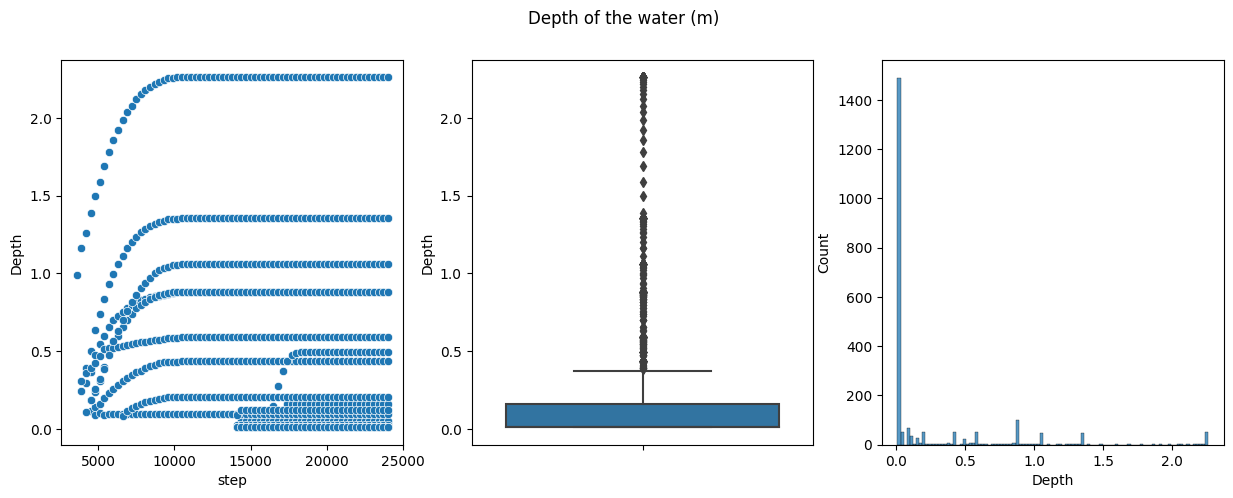

In [35]:
descriptive_plots(df, 'Depth', 'Depth of the water (m)')

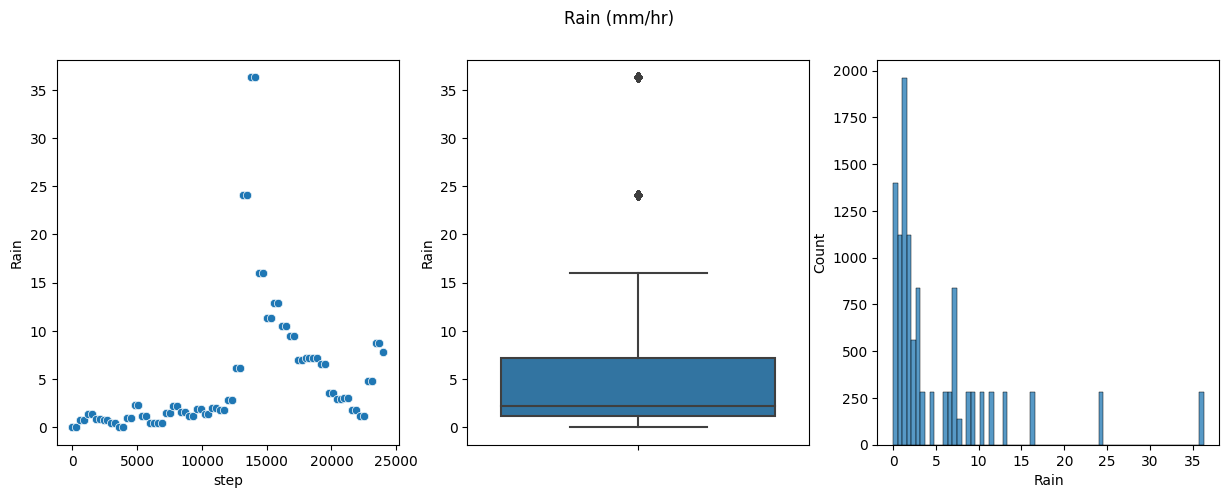

In [34]:
descriptive_plots(df, 'Rain', 'Rain (mm/hr)')

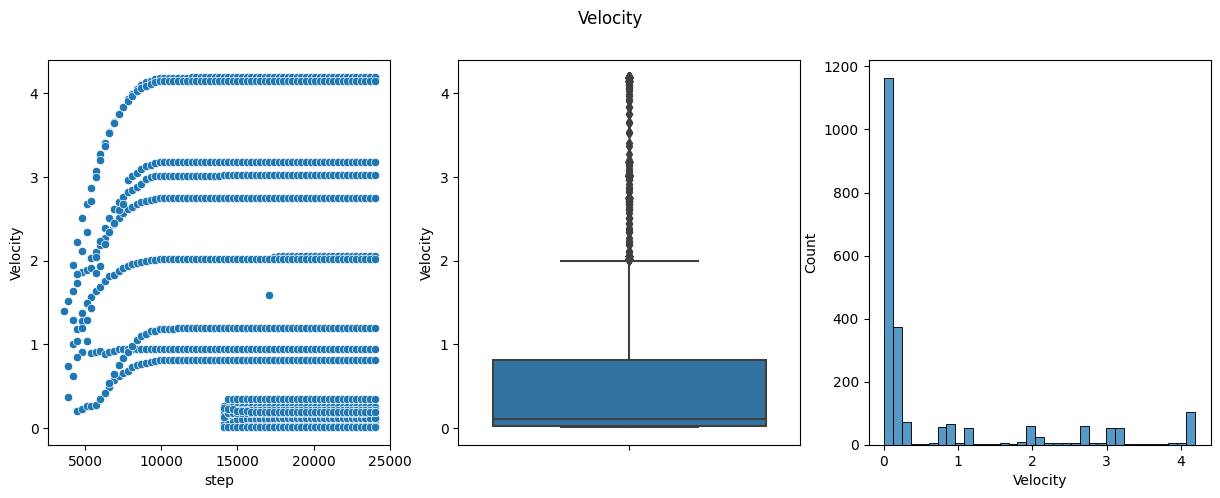

In [36]:
descriptive_plots(df, 'Velocity', 'Velocity')